<a href="https://colab.research.google.com/github/Pakhi27/Mall-Customer-Dataset-Unsupervised-Machine-Learning/blob/main/Mall_Customers_Dataset_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
dataset=pd.DataFrame(df)

In [10]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

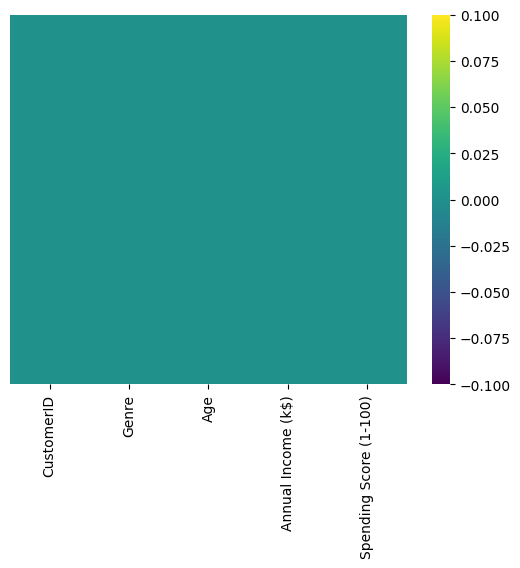

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
# EDA

Text(0.5, 1.0, 'Distribution of Customer Age')

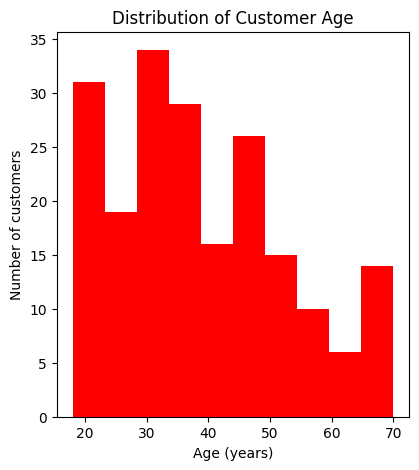

In [11]:
# 1. Distribution of Age and Annual Income
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(df["Age"],color="r")
plt.xlabel("Age (years)")
plt.ylabel("Number of customers")
plt.title("Distribution of Customer Age")

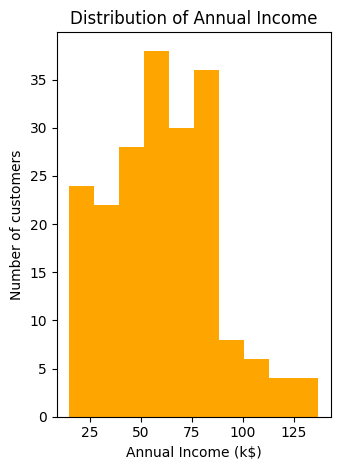

In [14]:
plt.subplot(122)
plt.hist(df["Annual Income (k$)"],color="orange")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of customers")
plt.title("Distribution of Annual Income")
plt.tight_layout()
plt.show()


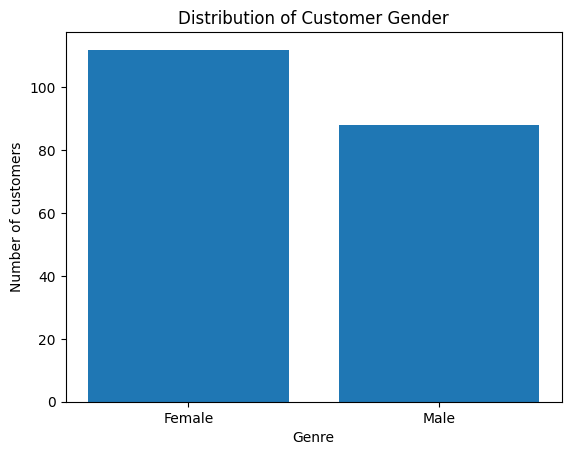

In [15]:
# 2. Gender Distribution
gender_counts = df["Genre"].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Genre")
plt.ylabel("Number of customers")
plt.title("Distribution of Customer Gender")
plt.show()

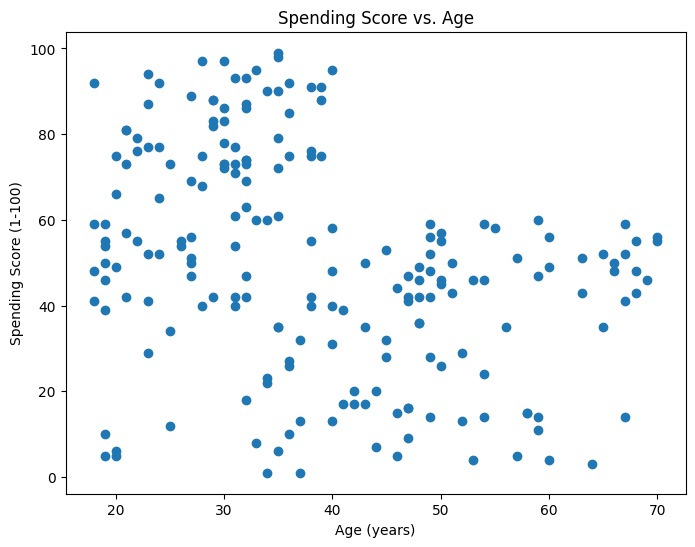

In [18]:
# 3. Scatter Plot: Age vs. Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age (years)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score vs. Age")
plt.show()


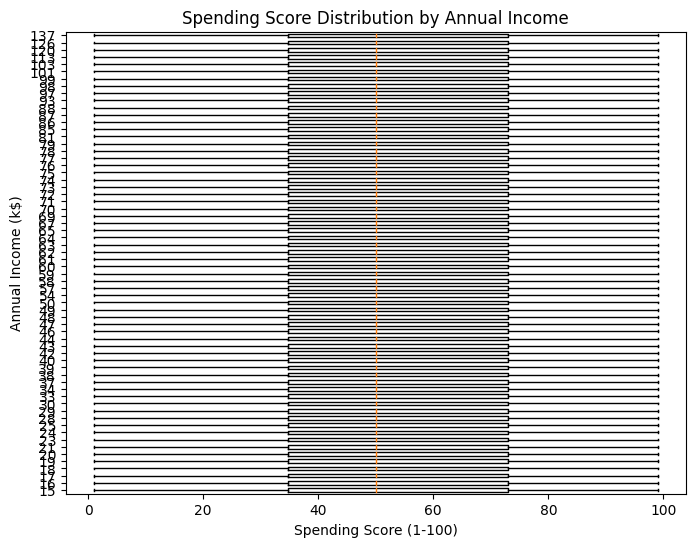

In [20]:
# 4. Box Plot: Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df["Spending Score (1-100)"] for income in df["Annual Income (k$)"].unique()],
    labels=df["Annual Income (k$)"].unique(),
    vert=False,
)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.title("Spending Score Distribution by Annual Income")
plt.show()

In [21]:
 #converting categorical values

In [22]:
pd.get_dummies(df['Genre'],drop_first=True).head()

,Male
0,True
1,True
2,False
3,False
4,False


In [24]:
Genre=pd.get_dummies(df['Genre'],drop_first=True)

In [25]:
df.drop(['Genre'],axis=1,inplace=True)

In [26]:
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [27]:
df=pd.concat([df,Genre],axis=1)

In [28]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [32]:
# sTandardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
scaler.fit(df)

StandardScaler()

In [34]:
scaled_data=scaler.transform(df)
scaled_data

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.49824268, -1.06573534, -1.5

In [30]:
# Applying PCA Algorithm
from sklearn.decomposition import PCA

In [31]:
pca=PCA(n_components=3)

In [35]:
data_pca=pca.fit_transform(scaled_data)

In [36]:
data_pca

array([[-2.31696460e+00, -4.54190250e-01,  1.45422997e+00],
       [-2.27239142e+00, -1.47410364e+00,  1.71287838e+00],
       [-2.45422326e+00, -6.92224280e-03, -7.33627964e-01],
       [-2.38646142e+00, -1.74993499e+00, -2.91280107e-01],
       [-2.39737671e+00, -3.69341159e-01, -6.36563897e-01],
       [-2.33384641e+00, -1.77165365e+00, -2.90795945e-01],
       [-2.38465790e+00,  7.34323845e-01, -9.16275146e-01],
       [-2.26899869e+00, -2.20083880e+00, -1.85547791e-01],
       [-2.24236580e+00,  2.72650086e+00,  6.72605768e-01],
       [-2.25237662e+00, -1.26890988e+00, -4.19227822e-01],
       [-2.21493022e+00,  2.58167648e+00,  7.09897075e-01],
       [-2.21533483e+00, -1.74129826e+00, -2.97375208e-01],
       [-2.30041257e+00,  1.63047026e+00, -1.13306535e+00],
       [-2.15909617e+00, -1.69661236e+00, -3.22378101e-01],
       [-2.07408068e+00,  1.13078827e+00,  1.04457761e+00],
       [-1.97107977e+00, -1.36629670e+00,  1.66193146e+00],
       [-2.15658392e+00, -3.46963550e-02

In [37]:
pca.explained_variance_

array([1.99507004, 1.35420929, 0.97725931])

Text(0, 0.5, 'Second Principal Component')

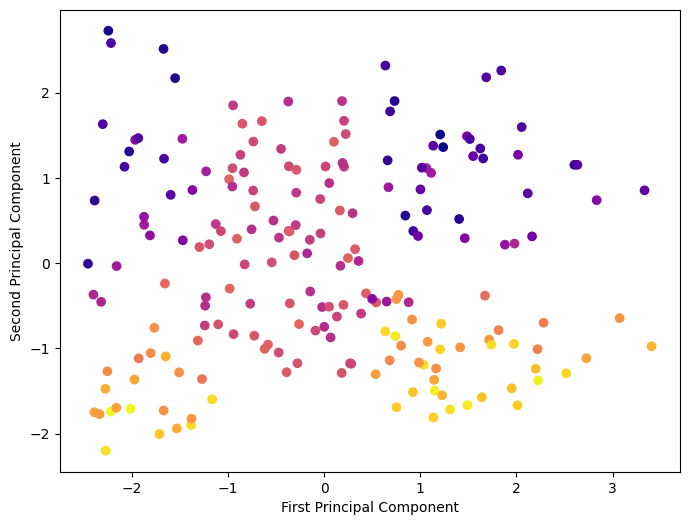

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0],data_pca[:, 1],c=df["Spending Score (1-100)"],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X=df.drop(["Male"],axis=1)
y=df["Male"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

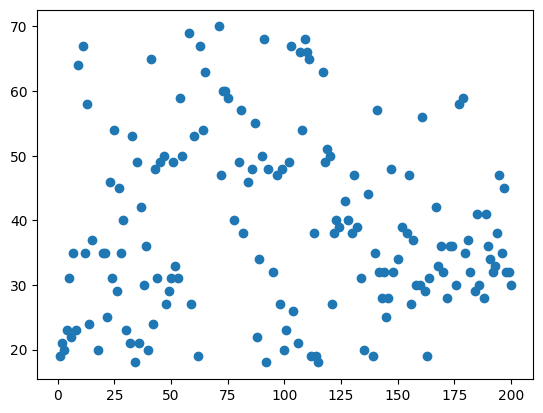

In [49]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])

K-Means Clustering


In [50]:

from sklearn.cluster import KMeans

In [51]:

## Manual Process
# Elbow method to select the K value
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [52]:
wcss

[821381.9687500001,
 323786.9241854637,
 216181.4499536178,
 159313.78692656313,
 125773.96525707058,
 99818.93450233087,
 82384.97925855973,
 68209.81303048956,
 60646.48832006487,
 54072.35370557805]

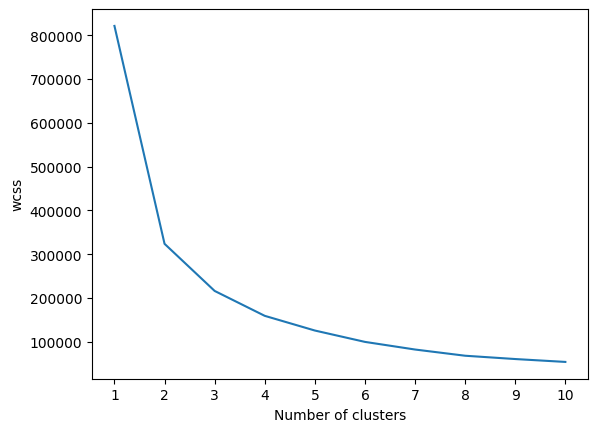

In [53]:
# Elbow method
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [57]:
 kmeans=KMeans(n_clusters=2,init='k-means++')

In [58]:
y_labels=kmeans.fit_predict(X_train)
y_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1], dtype=int32)

In [59]:
y_test_labels=kmeans.predict(X_test)

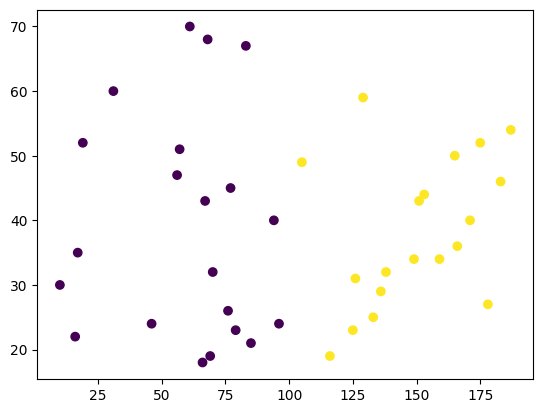

In [61]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1],c=y_test_labels)

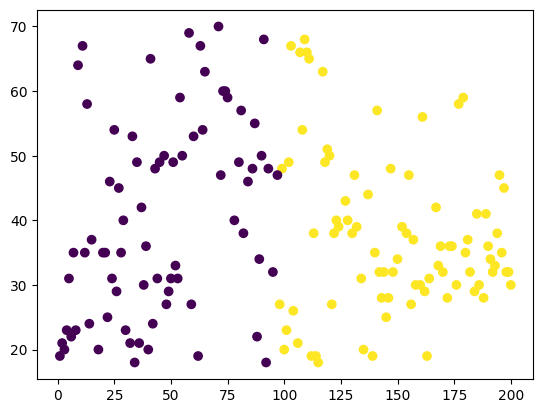

In [62]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_labels)

In [63]:

# Knee Locator
!pip install kneed

In [64]:
from kneed import KneeLocator

In [70]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [66]:
# Performance Metrics
from sklearn.metrics import silhouette_score


In [67]:
silhouette_coefficients=[]
for k in range(2,11):
   kmeans=KMeans(n_clusters=k,init='k-means++')
   kmeans.fit(X_train)
   score=silhouette_score(X_train,kmeans.labels_)
   silhouette_coefficients.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [68]:
silhouette_coefficients

[0.4789844321036913,
 0.39795211190950514,
 0.4346771129796876,
 0.42567477424129657,
 0.4199715000407682,
 0.41481464526429823,
 0.4200929255419178,
 0.39195359722439005,
 0.4020815838271837]

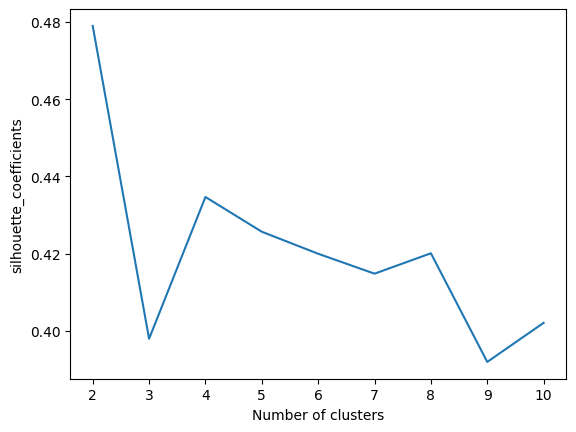

In [69]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

Hierarchial Clustering


Text(0, 0.5, 'Eucledian Distance')

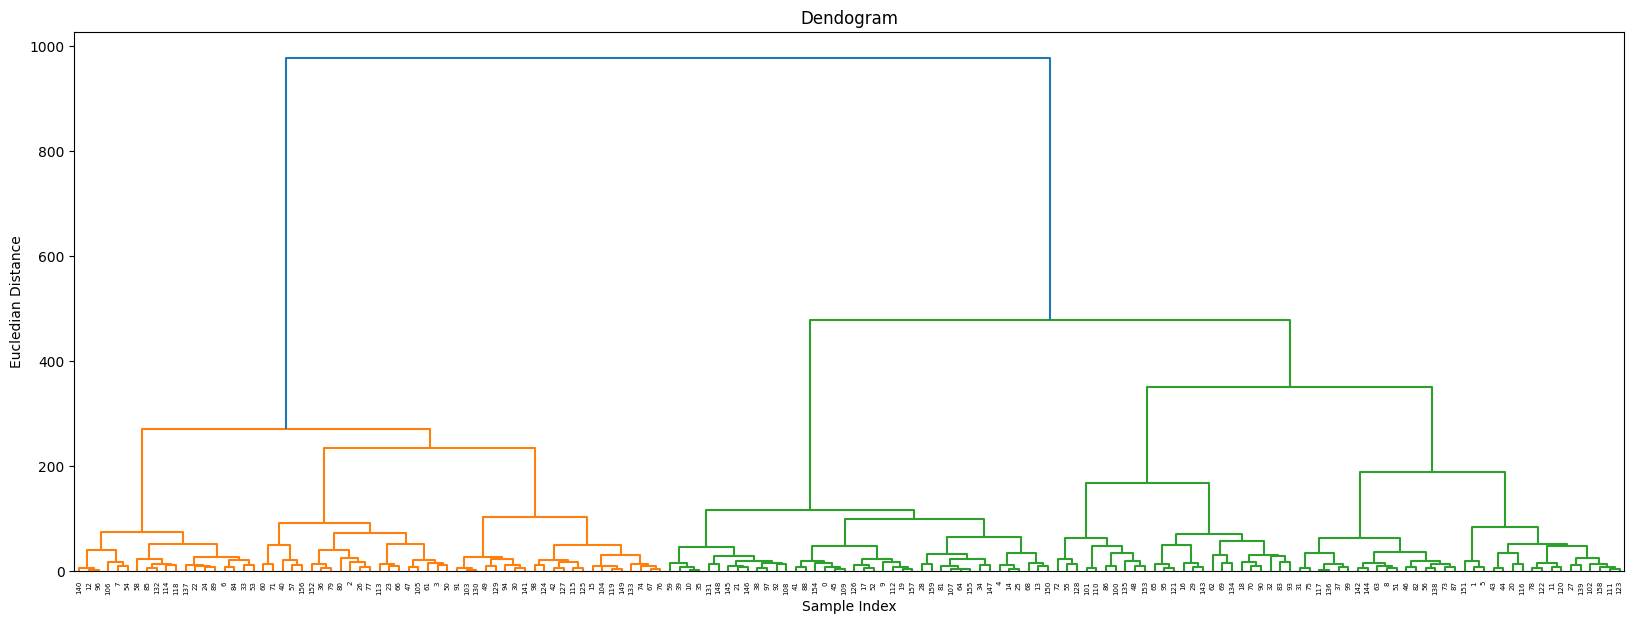

In [72]:
# Agglomerative clustering
# construct a dendogram

import scipy.cluster.hierarchy as sc
# plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

# create dendogram
sc.dendrogram(sc.linkage(X_train,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [73]:

from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [74]:
cluster.labels_

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0])

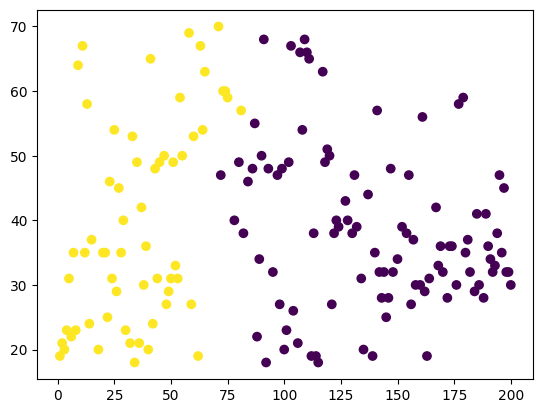

In [75]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=cluster.labels_)


In [79]:
silhouette_coefficients=[]
for k in range(2,11):
   agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
   agglo.fit(X_train)
   score=silhouette_score(X_train,agglo.labels_)
   silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [80]:


silhouette_coefficients


[0.4686423869159396,
 0.3519743597148254,
 0.4116772592693789,
 0.4087575230690558,
 0.4131932499642077,
 0.39899622100126325,
 0.40286362826363253,
 0.3911078342945068,
 0.3779858471283821]

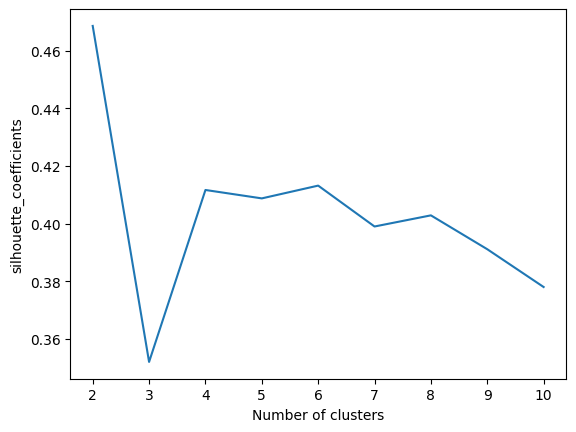

In [81]:

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()


DBSCAN CLUSTREING


In [88]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1)

In [89]:
dbscan.fit(X_train)

DBSCAN(eps=0.1)

In [90]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

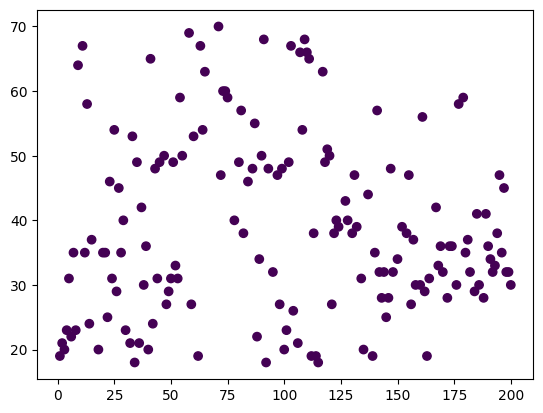

In [91]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=dbscan.labels_)

Anomaly Detection-Isolation Forest

In [92]:
from sklearn.ensemble import IsolationForest

In [99]:

clf=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.4,random_state=42)
clf.fit(X_test)
predictions=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [100]:

predictions

array([ 1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1])

In [104]:
import numpy as np
index=np.where(predictions<0)
index

(array([ 1,  2,  3,  4,  8,  9, 11, 12, 14, 15, 18, 21, 25, 30, 31, 36]),)

In [105]:
negative_predictions = predictions[index]
print(negative_predictions)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


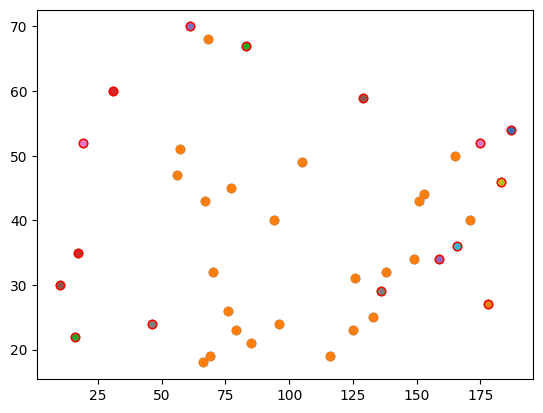

In [106]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1])
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1])  # Initial scatter plot

# Highlight negative predictions in red (assuming 'index' contains valid negative prediction indexes)
for i in index[0]:  # Iterate through the retrieved indexes array
  red_x = X_test.iloc[i, 0]
  red_y = X_test.iloc[i, 1]
  plt.scatter(red_x, red_y, edgecolors="r")

plt.show()  # Display the scatter plot


Anomaly Detection-Local Outlier Factor

In [107]:
from sklearn.neighbors import LocalOutlierFactor

In [108]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [121]:
clf.fit(X_train)

LocalOutlierFactor(contamination=0.1)

In [122]:

y_pred = clf.fit_predict(X_train)

In [123]:

print(y_pred)

[ 1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1]


In [124]:

import numpy as np
index=np.where(y_pred<0)
index

(array([  1,   5,  40,  55,  57,  61,  66,  72,  95, 113, 121, 128, 135,
        139, 143, 151]),)

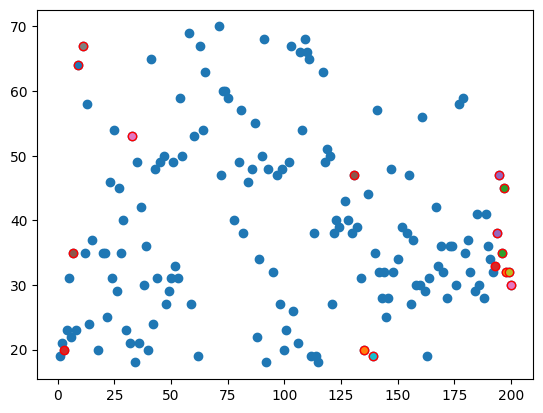

In [125]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1])

# Highlight negative predictions in red (assuming 'index' contains valid negative prediction indexes)
for i in index[0]:  # Iterate through the retrieved indexes array
  red_x = X_train.iloc[i, 0]
  red_y = X_train.iloc[i, 1]
  plt.scatter(red_x, red_y, edgecolors="r")

plt.show()  # Display the scatter plot


Assosciation Rule-Apriori Algorithm

In [126]:

pip install apyori


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=8429dab07ab82cea986015efed3af72197d196b0ecdfe143b43e8ea74b049987
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [130]:
from math import floor
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from apyori import apriori

# Assuming cancer_dataset holds your breast cancer data (modify based on data structure)
# ... (load your data)

# Discretize continuous features
features_to_discretize = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Get integer indices for features
feature_indices = [df.columns.get_loc(col) for col in features_to_discretize]
discretized_data = discretizer.fit_transform(df.iloc[:,feature_indices])  # Assuming data is in a DataFrame

# Encode categorical features
features_to_encode = ["Male"]
feature_indices = [df.columns.get_loc(col) for col in features_to_encode]
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df.iloc[:,feature_indices])  # Assuming data is in a DataFrame

# Select features for Apriori (replace with relevant features)
apriori_features = pd.concat([pd.DataFrame(discretized_data), pd.DataFrame(encoded_data)], axis=1)  # Combine discretized and encoded data

# Minimum support for frequent itemsets (adjust as needed)
min_support = 0.2

# Apply Apriori algorithm
# ... (your code for data preprocessing)

# Convert DataFrame to list of lists for Apriori
# ... (your code for data preprocessing)

transactions = apriori_features.values.tolist()

# Apply Apriori algorithm with minimum support
frequent_itemsets = apriori(transactions, min_support=min_support, use_colnames=True)

# Print frequent itemsets
for itemset in frequent_itemsets:
    print(itemset)
##  These itemsets represent combinations of features (discretized or encoded) that appear together frequently in the breast cancer dataset, potentially indicating relationships between them.



RelationRecord(items=frozenset({0.0}), support=0.805, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({0.0}), confidence=0.805, lift=1.0)])
RelationRecord(items=frozenset({1.0}), support=0.85, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({1.0}), confidence=0.85, lift=1.0)])
RelationRecord(items=frozenset({2.0}), support=0.705, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({2.0}), confidence=0.705, lift=1.0)])
RelationRecord(items=frozenset({3.0}), support=0.345, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({3.0}), confidence=0.345, lift=1.0)])
RelationRecord(items=frozenset({4.0}), support=0.28, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({4.0}), confidence=0.28, lift=1.0)])
RelationRecord(items=frozenset({0.0, 1.0}), support=0.655, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
